# Vehicels dataset

In [1]:
#Import the labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

# Load the dataset

In [2]:
df=pd.read_csv('C:\\Users\\PMLS\\Favorites\\Machine learning &classification\\diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # cheking the unique values

Unique values in encounter_id: [  2278392    149190     64410 ... 443854148 443857166 443867222]
Unique values in patient_nbr: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Unique values in race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Unique values in gender: ['Female' 'Male' 'Unknown/Invalid']
Unique values in age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values in admission_type_id: [6 1 2 3 4 5 8 7]
Unique values in discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values in admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values in time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Unique values in payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' '

In [6]:
#  We can replace all "?" with the NaN
df = df.replace('?', np.nan)

In [7]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # cheking the unique values

Unique values in encounter_id: [  2278392    149190     64410 ... 443854148 443857166 443867222]
Unique values in patient_nbr: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Unique values in race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
Unique values in gender: ['Female' 'Male' 'Unknown/Invalid']
Unique values in age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values in admission_type_id: [6 1 2 3 4 5 8 7]
Unique values in discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values in admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values in time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Unique values in payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' '

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<Axes: ylabel='number_diagnoses'>

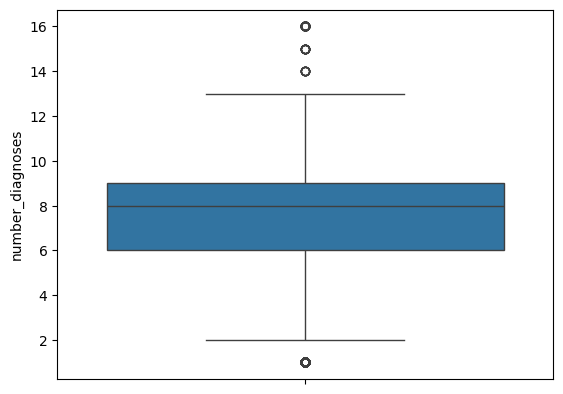

In [9]:
# we make the boxplot and check the outliers
sns.boxplot(df['number_diagnoses'])

In [10]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df['number_diagnoses'].quantile(0.25)
Q3 = df['number_diagnoses'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['number_diagnoses'] = np.where(df['number_diagnoses'] < lower_limit, lower_limit,
                                  np.where(df['number_diagnoses'] > upper_limit, upper_limit, df['number_diagnoses']))


Lower Limit: 1.5
Upper Limit: 13.5


<Axes: ylabel='number_diagnoses'>

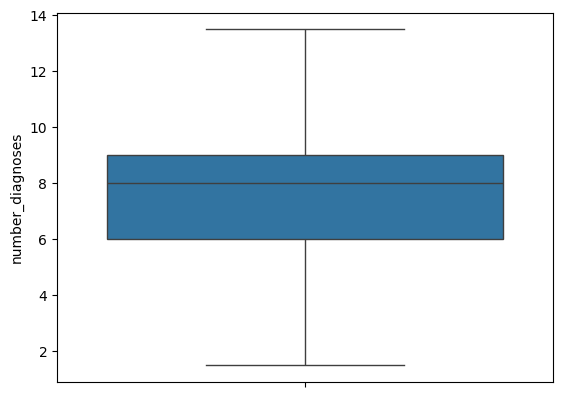

In [11]:
# we make the boxplot and check the outliers
sns.boxplot(df['number_diagnoses'])

<Axes: ylabel='admission_type_id'>

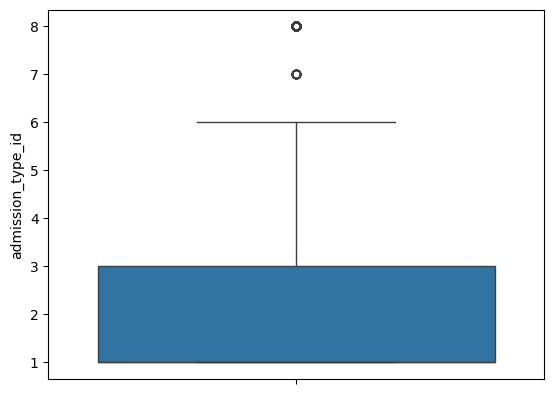

In [12]:
sns.boxplot(df['admission_type_id'])

In [13]:
#  we can handle the outliers by IQR method
Q1 = df['admission_type_id'].quantile(0.25)
Q3 = df['admission_type_id'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['admission_type_id'] = np.where(df['admission_type_id'] < lower_limit, lower_limit,
                                  np.where(df['admission_type_id'] > upper_limit, upper_limit, df['admission_type_id']))


Lower Limit: -2.0
Upper Limit: 6.0


<Axes: ylabel='admission_type_id'>

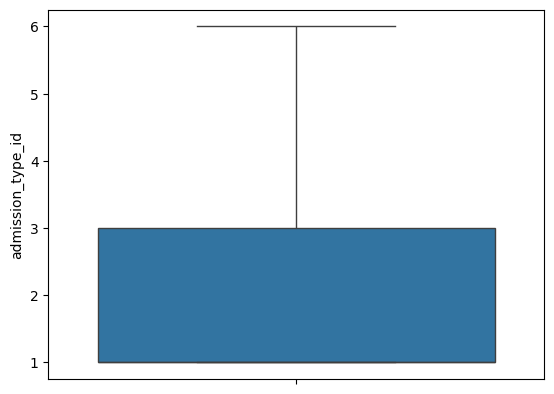

In [14]:
sns.boxplot(df['admission_type_id'])

<Axes: ylabel='discharge_disposition_id'>

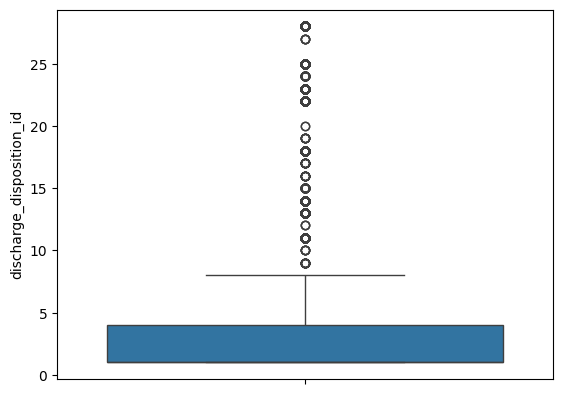

In [15]:
sns.boxplot(df['discharge_disposition_id'])

In [16]:
#  we can handle the outliers by IQR method
Q1 = df['discharge_disposition_id'].quantile(0.25)
Q3 = df['discharge_disposition_id'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['discharge_disposition_id'] = np.where(df['discharge_disposition_id'] < lower_limit, lower_limit,
                                  np.where(df['discharge_disposition_id'] > upper_limit, upper_limit, df['discharge_disposition_id']))


Lower Limit: -3.5
Upper Limit: 8.5


<Axes: ylabel='discharge_disposition_id'>

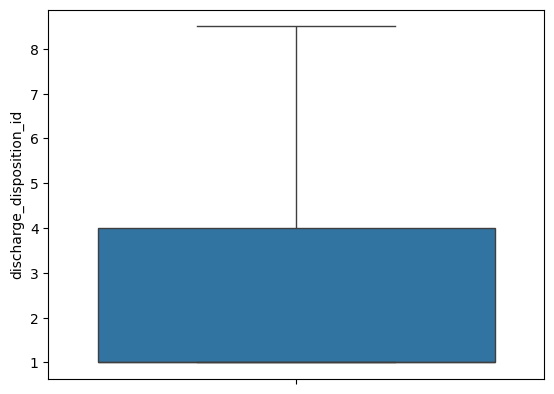

In [17]:
sns.boxplot(df['discharge_disposition_id'])

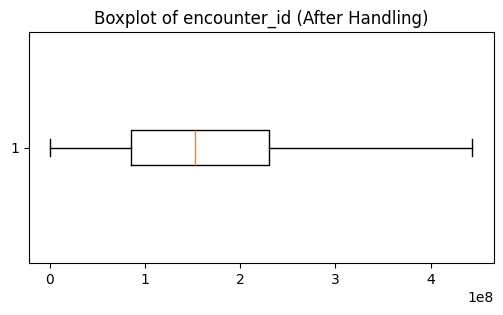

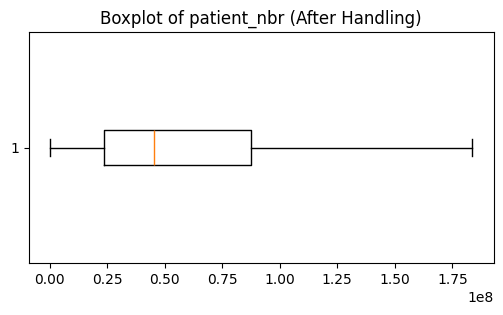

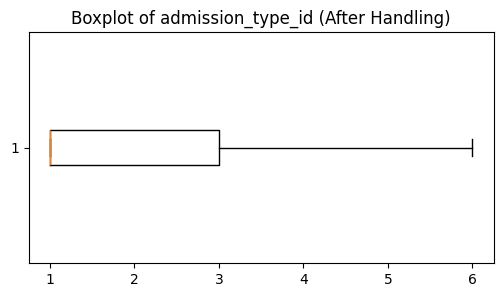

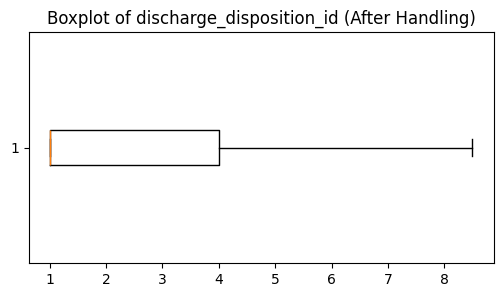

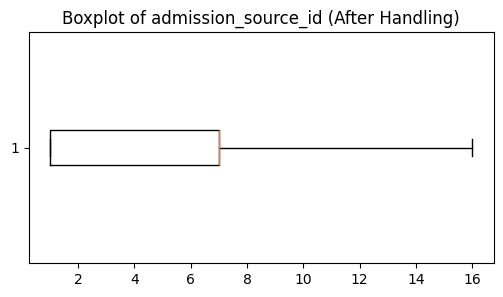

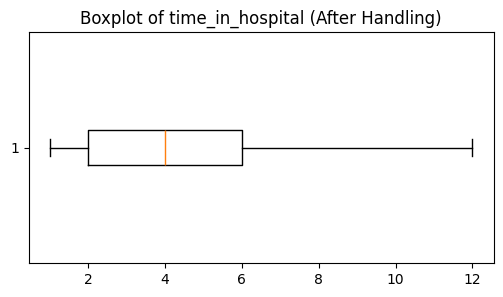

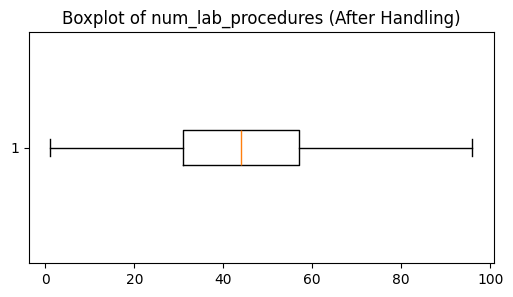

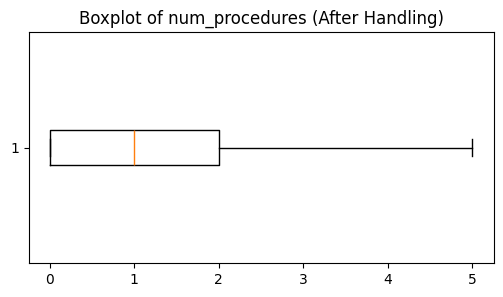

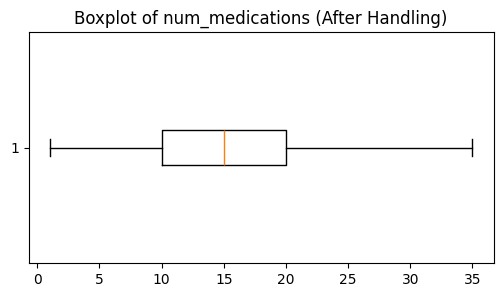

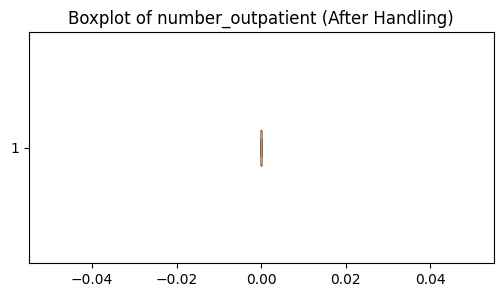

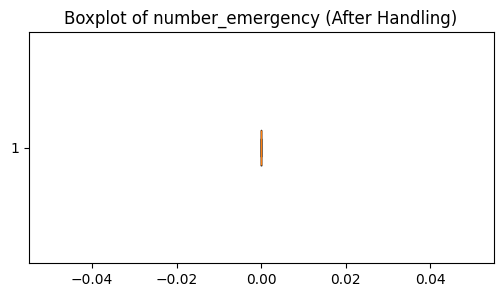

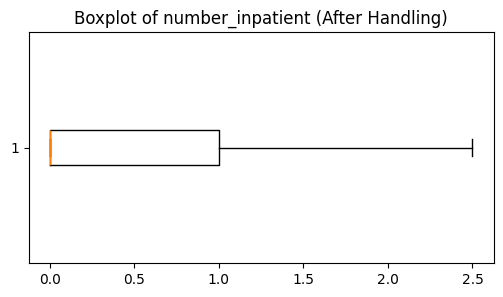

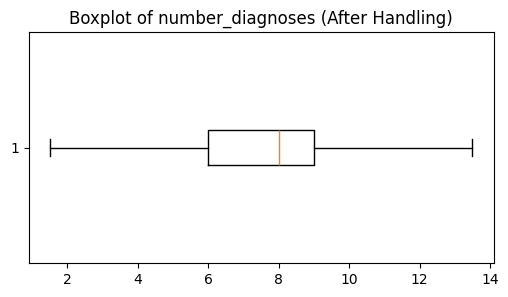

In [18]:
# we can handle outliers by IQR method and all numeric feature outlier handle
df_cleaned = df.copy()
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned[col] = df_cleaned[col].clip(lower_bound, upper_bound)

#Visualize again after handling
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df_cleaned[col], vert=False)
    plt.title(f"Boxplot of {col} (After Handling)")
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

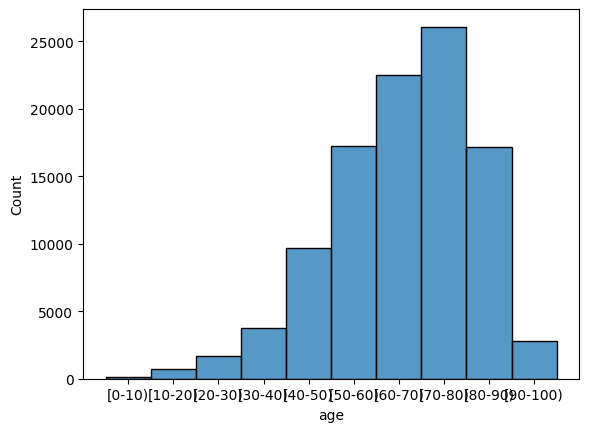

In [19]:
sns.histplot(data=df,x='age',bins=10 )

# Checks the values counts

In [20]:
# checks the counts values of every columns
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: encounter_id
encounter_id
443867222    1
2278392      1
149190       1
64410        1
500364       1
            ..
28236        1
15738        1
12522        1
63768        1
55842        1
Name: count, Length: 101766, dtype: int64

Column: patient_nbr
patient_nbr
88785891     40
43140906     28
88227540     23
1660293      23
23199021     23
             ..
174477542     1
38726739      1
77391171      1
89869032      1
63555939      1
Name: count, Length: 71518, dtype: int64

Column: race
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Column: gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Column: age
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtyp

# Checking the missing values

In [21]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [22]:
#Handle the missing values of numeric columns(With mean)
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
# Handle categorical columns (fill with mode)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

# Apply Label_Encoder method

In [24]:
# Select only categorical (object) columns
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  int64  
 3   gender                    101766 non-null  int64  
 4   age                       101766 non-null  int64  
 5   weight                    101766 non-null  int64  
 6   admission_type_id         101766 non-null  float64
 7   discharge_disposition_id  101766 non-null  float64
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                101766 non-null  int64  
 11  medical_specialty         101766 non-null  int64  
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  i

# Split the data

In [26]:
X=df.drop('diabetesMed',axis=1)
y=df['diabetesMed']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling method

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [29]:
# we apply smote function 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("\nAfter SMOTE:")
print(X_train_res.shape, y_train_res.shape)


After SMOTE:
(125380, 49) (125380,)


# Train the model

In [32]:
models = {
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    " GaussianNB":  GaussianNB()
}

# Step 6: Train and evaluate each model using a for loop
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc


🔹 Training SVC...
✅ Accuracy: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4681
           1       1.00      1.00      1.00     15673

    accuracy                           1.00     20354
   macro avg       1.00      1.00      1.00     20354
weighted avg       1.00      1.00      1.00     20354


🔹 Training KNeighborsClassifier...
✅ Accuracy: 0.8791
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      4681
           1       0.99      0.85      0.92     15673

    accuracy                           0.88     20354
   macro avg       0.83      0.92      0.85     20354
weighted avg       0.92      0.88      0.89     20354


🔹 Training Random Forest...
✅ Accuracy: 0.9996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4681
           1       1.00      1.00      1.00     15673

    accuracy                           1.